<a href="https://colab.research.google.com/github/Belac44/Competitions/blob/main/DSAIC_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
print("Train:",train.shape)
print("Test:",test.shape)

Train: (23524, 13)
Test: (10086, 12)


In [3]:
df = train.append(test)
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.6+ MB


In [5]:
df.describe()

,year,household_size,age_of_respondent
count,33610.000000,33610.000000,33610.000000
mean,2016.975930,3.791877,38.656114
std,0.847353,2.223138,16.447127
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
df.nunique()

country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64

In [7]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype != "O"]
numerical_columns

['year', 'household_size', 'age_of_respondent']

In [8]:
df[numerical_columns].nunique()

year                  3
household_size       20
age_of_respondent    85
dtype: int64

In [9]:
discrete_columns = [feature for feature in numerical_columns if df[feature].nunique() < 10]
discrete_columns

['year']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


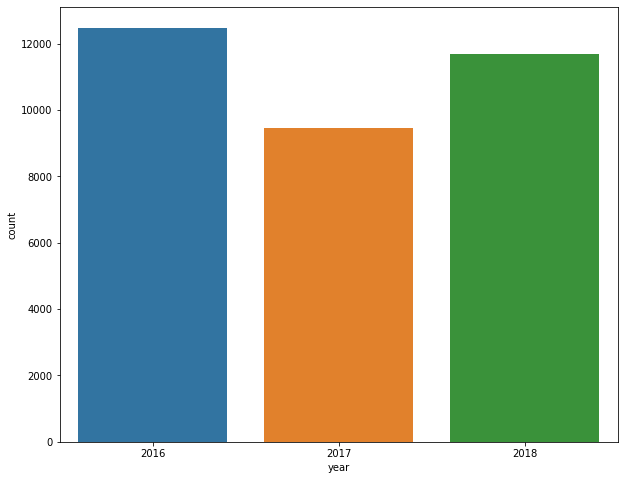

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df['year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


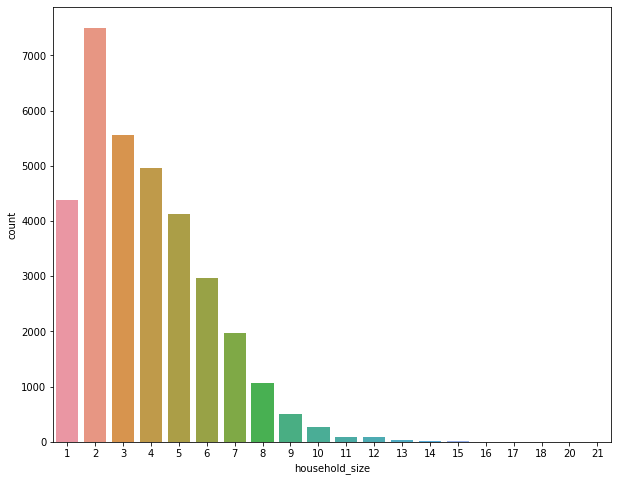

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(df['household_size'])
plt.show()

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != "uniqueid" and feature != "bank_account"]
categorical_features

['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [13]:
df[categorical_features].nunique()

country                    4
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


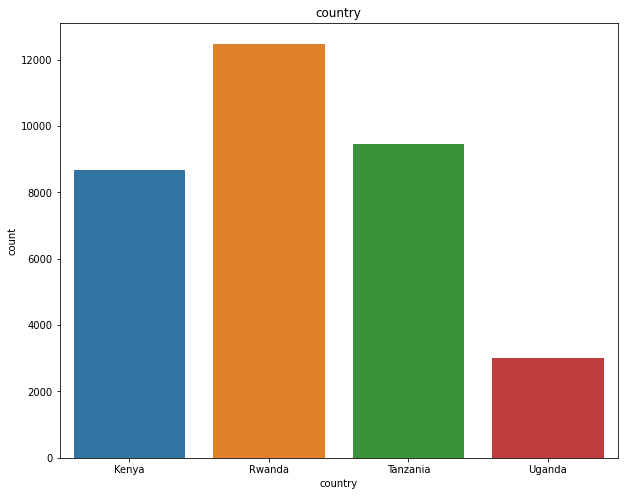

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


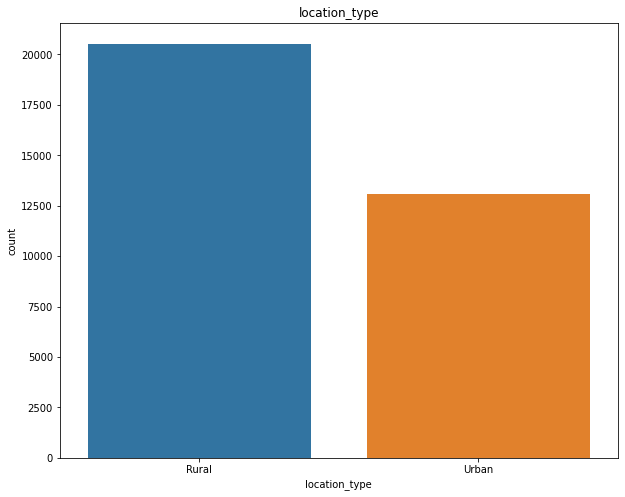

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


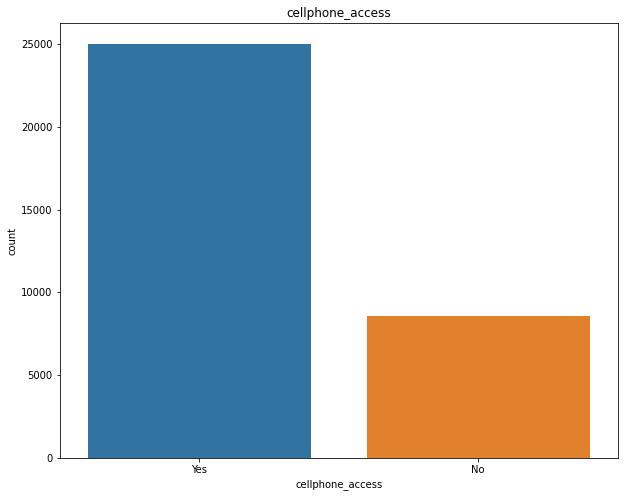

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


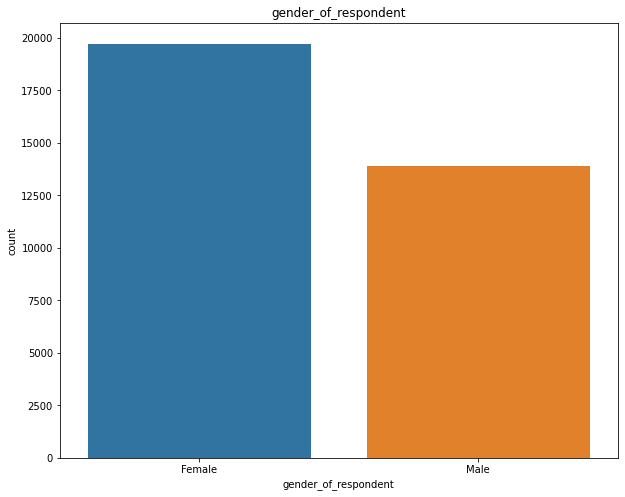

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


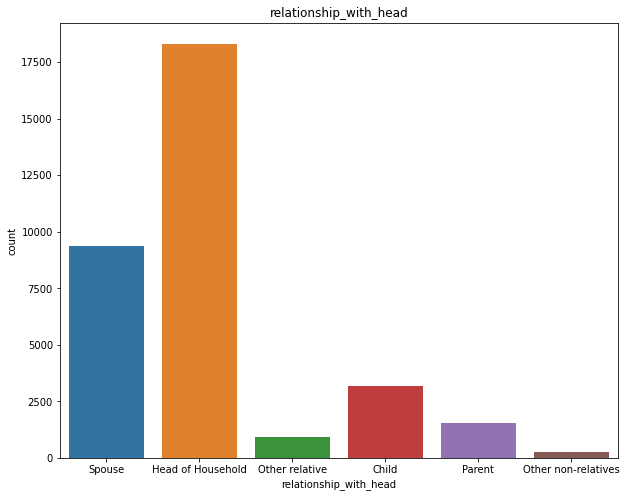

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


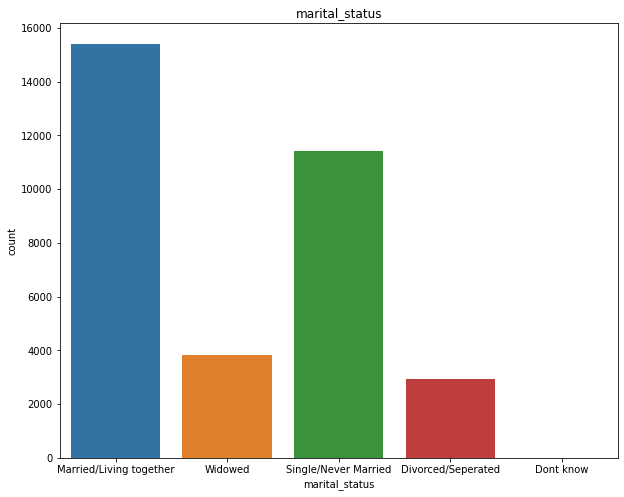

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


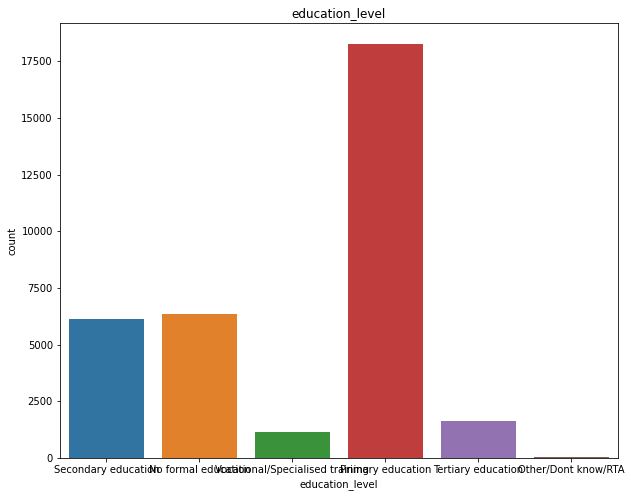

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


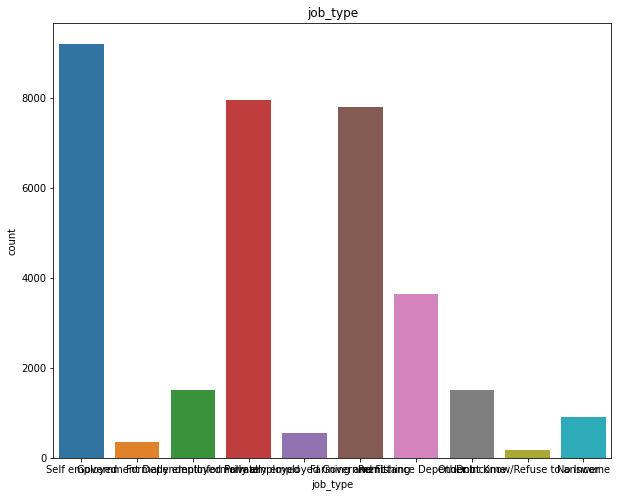

In [14]:
for feature in categorical_features:
  plt.figure(figsize=(10,8))
  sns.countplot(df[feature])
  plt.title(feature)
  plt.show()

In [15]:
for feature in categorical_features:
  print(df[feature].value_counts(normalize=True),"\n\n")

Rwanda      0.371318
Tanzania    0.281434
Kenya       0.257929
Uganda      0.089319
Name: country, dtype: float64 


Rural    0.61089
Urban    0.38911
Name: location_type, dtype: float64 


Yes    0.744213
No     0.255787
Name: cellphone_access, dtype: float64 


Female    0.586849
Male      0.413151
Name: gender_of_respondent, dtype: float64 


Head of Household      0.545016
Spouse                 0.278637
Child                  0.094942
Parent                 0.046147
Other relative         0.027551
Other non-relatives    0.007706
Name: relationship_with_head, dtype: float64 


Married/Living together    0.458554
Single/Never Married       0.340077
Widowed                    0.113508
Divorced/Seperated         0.087593
Dont know                  0.000268
Name: marital_status, dtype: float64 


Primary education                  0.543588
No formal education                0.188962
Secondary education                0.182237
Tertiary education                 0.049063
Vocational/Speci

In [16]:
##Feature Engineering
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   year                                             33610 non-null  int64 
 1   uniqueid                                         33610 non-null  object
 2   bank_account                                     23524 non-null  object
 3   household_size                                   33610 non-null  int64 
 4   age_of_respondent                                33610 non-null  int64 
 5   country_Rwanda                                   33610 non-null  uint8 
 6   country_Tanzania                                 33610 non-null  uint8 
 7   country_Uganda                                   33610 non-null  uint8 
 8   location_type_Urban                              33610 non-null  uint8 
 9   cellphone_access_Yes                   

In [17]:
train = df[df['bank_account'].notnull()]
train.shape

(23524, 34)

In [18]:
train.head()

,year,uniqueid,bank_account,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_1,Yes,3,24,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,No,5,70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,uniqueid_3,Yes,5,26,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,uniqueid_4,No,5,34,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,No,8,26,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
test = df[df['bank_account'].isnull()] 
test.shape

(10086, 34)

In [20]:
test = test.drop(columns = 'bank_account')
test.head()

,year,uniqueid,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_6056,3,30,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2018,uniqueid_6060,7,51,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,2018,uniqueid_6065,3,77,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2018,uniqueid_6072,6,39,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2018,uniqueid_6073,3,16,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [21]:
X = train.drop(columns=['uniqueid','bank_account'])
y = train['bank_account']

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y,columns=['bank_account'])
y.head()

,bank_account
0,1
1,0
2,1
3,0
4,0


In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,stratify = y,random_state=17)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("F1 Score:",f1_score(y_pred = y_pred, y_true = y_test))
print("Accuracy score:",accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 Score: 0.4632610216934919
Accuracy score: 0.8695800034007822


In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()

param_grid = {
    "n_estimators":[90,100,115,130],
    "criterion":['gini','entropy'],
    "max_depth":range(2,10,2),
    "min_samples_leaf":range(1,10,2),
    "min_samples_split":range(2,10,2),
    "max_features":['auto','log2']
}

grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


In [25]:
from xgboost import XGBClassifier

model2 = XGBClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("F1 Score:",f1_score(y_pred = y_pred, y_true = y_test))
print("Accuracy score:",accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.46153846153846156
Accuracy score: 0.8904948138071757


In [31]:
xgb_model = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=0.6, max_depth=5)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print("F1 Score:",f1_score(y_pred = y_pred, y_true = y_test))
print("Accuracy score:",accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.4701130856219709
Accuracy score: 0.8884543444992348


In [30]:
from sklearn.model_selection import GridSearchCV

xg_model = XGBClassifier()
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }

my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'gamma': 0.5, 'max_depth': 5, 'min_child_weighth': 1, 'subsample': 0.6}


In [27]:
uniqueid = test['uniqueid']
test = test.drop(columns = "uniqueid")
model2.fit(X,y)
y_pred = model2.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
submission = pd.DataFrame({"uniqueid":uniqueid,"bank_account":y_pred})
submission.head()

,uniqueid,bank_account
0,uniqueid_6056,1
1,uniqueid_6060,1
2,uniqueid_6065,0
3,uniqueid_6072,0
4,uniqueid_6073,0
